# Netflix Original Films & IMDB Scores

## Kütüphanelerin Yüklenmesi

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Verisetinin Yüklenmesi

In [88]:
data = pd.read_csv("NetflixOriginals.csv",encoding="ISO-8859-1")
data['IMDB Score'] = data['IMDB Score'].astype('float')


In [89]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## 1-) Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?

In [90]:
Movie_Length = []
for i in data.Runtime:
  if i <= 80:
    Movie_Length.append("Too Short")
  if i > 80 and i<= 120:
    Movie_Length.append("Normal")
  if i > 120:
    Movie_Length.append("Too Long")

In [91]:
data['MovieLength'] = Movie_Length
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Too Short
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Normal
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Too Short
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Normal
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Normal


In [92]:
new_data = data[data.MovieLength == 'Too Long']
new_data

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,Too Long
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,Too Long
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,Too Long
16,Ghost Stories,Horror anthology,"January 1, 2020",144,4.3,Hindi,Too Long
77,Sandy Wexler,Comedy,"April 14, 2017",131,5.2,English,Too Long
...,...,...,...,...,...,...,...
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,Too Long
562,The Trial of the Chicago 7,Drama,"October 16, 2020",130,7.8,English,Too Long
565,Marriage Story,Drama,"December 6, 2019",136,7.9,English,Too Long
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Too Long


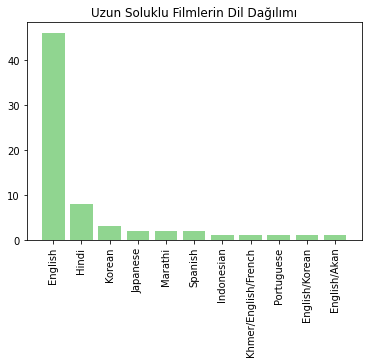

In [93]:
uzun_diller=new_data["Language"].value_counts()
plt.bar(uzun_diller.index,uzun_diller,color="#90d590")
plt.xticks(rotation=90)
plt.title("Uzun Soluklu Filmlerin Dil Dağılımı")
plt.show()

## 2-) 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
df=new_data   #Tarih formatını değiştirme
df['Premiere'] = pd.to_datetime(df.Premiere, format='%B %d, %Y')
df['Premiere'] = df['Premiere'].dt.strftime('%Y-%m-%d')

In [95]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
5,Drive,Action,2019-11-01,147,3.5,Hindi,Too Long
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English,Too Long
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi,Too Long
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi,Too Long
77,Sandy Wexler,Comedy,2017-04-14,131,5.2,English,Too Long
...,...,...,...,...,...,...,...
561,The Irishman,Crime drama,2019-11-27,209,7.8,English,Too Long
562,The Trial of the Chicago 7,Drama,2020-10-16,130,7.8,English,Too Long
565,Marriage Story,Drama,2019-12-06,136,7.9,English,Too Long
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,Too Long


In [ ]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

In [97]:
timeslice1 = df[(df['Premiere'] > '2018-12-31') & (df['Premiere'] <= '2020-05-31')]
timeslice1 #2019 Ocak ile 2020 Haziran tarihleri arasında çekilmiş filmler

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
5,Drive,Action,2019-11-01,147,3.5,Hindi,Too Long
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi,Too Long
161,15 August,Comedy-drama,2019-03-29,124,5.8,Marathi,Too Long
164,All Day and a Night,Drama,2020-05-01,121,5.8,English,Too Long
220,6 Underground,Action,2019-12-13,128,6.1,English,Too Long
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese,Too Long
288,Time to Hunt,Thriller,2020-04-23,134,6.3,Korean,Too Long
315,Triple Frontier,Action-thriller,2019-03-13,125,6.4,English,Too Long
353,It Takes a Lunatic,Documentary,2019-10-25,126,6.6,English,Too Long
362,The Red Sea Diving Resort,Spy thriller,2019-07-31,130,6.6,English,Too Long


In [98]:
doc = timeslice1[(timeslice1['Genre'] == 'Documentary' )] #2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri
doc

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
353,It Takes a Lunatic,Documentary,2019-10-25,126,6.6,English,Too Long
494,The Edge of Democracy,Documentary,2019-06-19,121,7.2,Portuguese,Too Long
536,Homecoming: A Film by Beyonce,Documentary,2019-04-17,137,7.5,English,Too Long
545,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,2019-06-12,144,7.6,English,Too Long


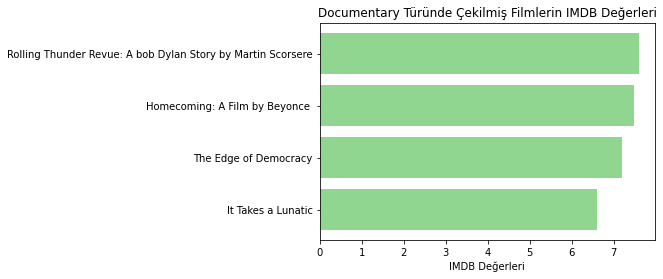

In [99]:
plt.barh(doc['Title'],doc['IMDB Score'],color="#90d590")
plt.title("Documentary Türünde Çekilmiş Filmlerin IMDB Değerleri")
plt.xlabel("IMDB Değerleri")
plt.show()

## 3-) İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [100]:
ing = data[data['Language']=='English']#Dili ingilizce olan filmler
ing.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Normal
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,Too Long
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,Too Short
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English,Too Short
14,Mercy,Thriller,"November 22, 2016",90,4.2,English,Normal


In [101]:
best= ing.nlargest(15,'IMDB Score')
best

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,Normal
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,Too Long
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,Normal
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Too Long
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,Normal
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,Too Short
571,13th,Documentary,"October 7, 2016",100,8.2,English,Normal
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English,Normal
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,Normal
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English,Normal


In [102]:
best= ing.nlargest(1,'IMDB Score')#İngilizce çekilen filmler içerisinde en yüksek IMDB puanına sahip olan tür
print(best['Genre'])

583    Documentary
Name: Genre, dtype: object


## 4-) 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [103]:
hind = data[data['Language']=='Hindi']#Dili hindi olan filmler
hind.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,MovieLength
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Normal
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,Too Long
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,Too Long
16,Ghost Stories,Horror anthology,"January 1, 2020",144,4.3,Hindi,Too Long
23,The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi,Normal


In [104]:
ort=hind['Runtime'].mean()#'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi 
ort

115.78787878787878

## 5-) 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [105]:
 print(len(data['Genre'].value_counts()),"adet Genre kategorisi bulunmaktadır")

115 adet Genre kategorisi bulunmaktadır


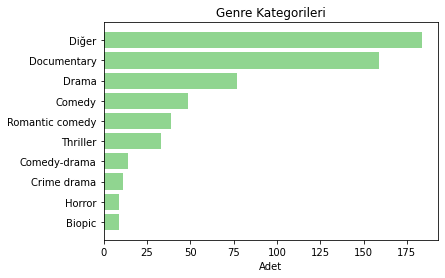

In [106]:
Genrelar=data['Genre'].value_counts()[0:9]
Genrelar["Diğer"]=data['Genre'].value_counts()[9:115].sum()
plt.barh(Genrelar.sort_values().index,Genrelar.sort_values(),	color="#90d590")
plt.title("Genre Kategorileri")
plt.xlabel("Adet")
plt.show()

## 6-) Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.



In [177]:
data["Language"].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

## 7-) IMDB puanı en yüksek olan ilk 10 film hangileridir?


In [133]:
sub = data.groupby(['Title'])[['IMDB Score']].max()

In [134]:
best_10_scores = sub.nlargest(10,'IMDB Score')
best_10_scores

,IMDB Score
Title,
David Attenborough: A Life on Our Planet,9.0
Emicida: AmarElo - It's All For Yesterday,8.6
Springsteen on Broadway,8.5
Ben Platt: Live from Radio City Music Hall,8.4
Taylor Swift: Reputation Stadium Tour,8.4
Winter on Fire: Ukraine's Fight for Freedom,8.4
Cuba and the Cameraman,8.3
Dancing with the Birds,8.3
13th,8.2


## 8-) IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [135]:
data.corr()
#korelasyon değerinin negatif çıkması iki değişkenin arasında ters yönde bir ilişki olduğunu gösterir.
#0.30-0.70 arası çıkan korelasyona sahip ise orta düzeyde ilişkileri vardır diyebiliriz.

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


Text(0.5, 1.0, 'Correlation Between Features')

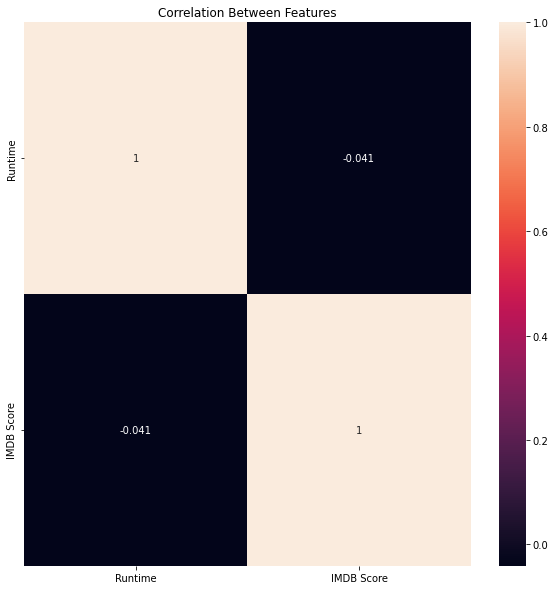

In [136]:
#Heatmap ile de görselleştiriyoruz.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True, color = '#90d590');
plt.title("Correlation Between Features")

## 9-) IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz

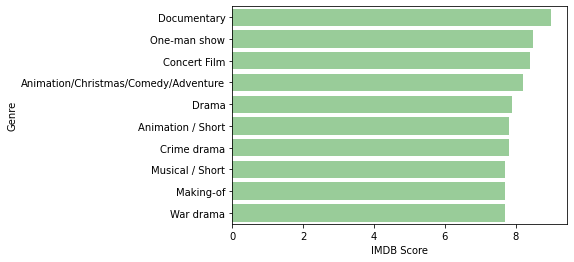

In [137]:
sub_data=data.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10]
genre = sub_data.reset_index()
sns.barplot(y=genre["Genre"], x=genre["IMDB Score"], color="#90d590")
plt.show()

## 10-) 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [138]:
sub_runtime = data.groupby(['Title'])[['Runtime']].max()

In [139]:
best_10_scores_runtime = sub_runtime.nlargest(10,"Runtime")
best_10_scores_runtime

,Runtime
Title,
The Irishman,209
Da 5 Bloods,155
Springsteen on Broadway,153
Citation,151
The Forest of Love,151
Ludo,149
Raat Akeli Hai,149
The Last Days of American Crime,149
Army of the Dead,148


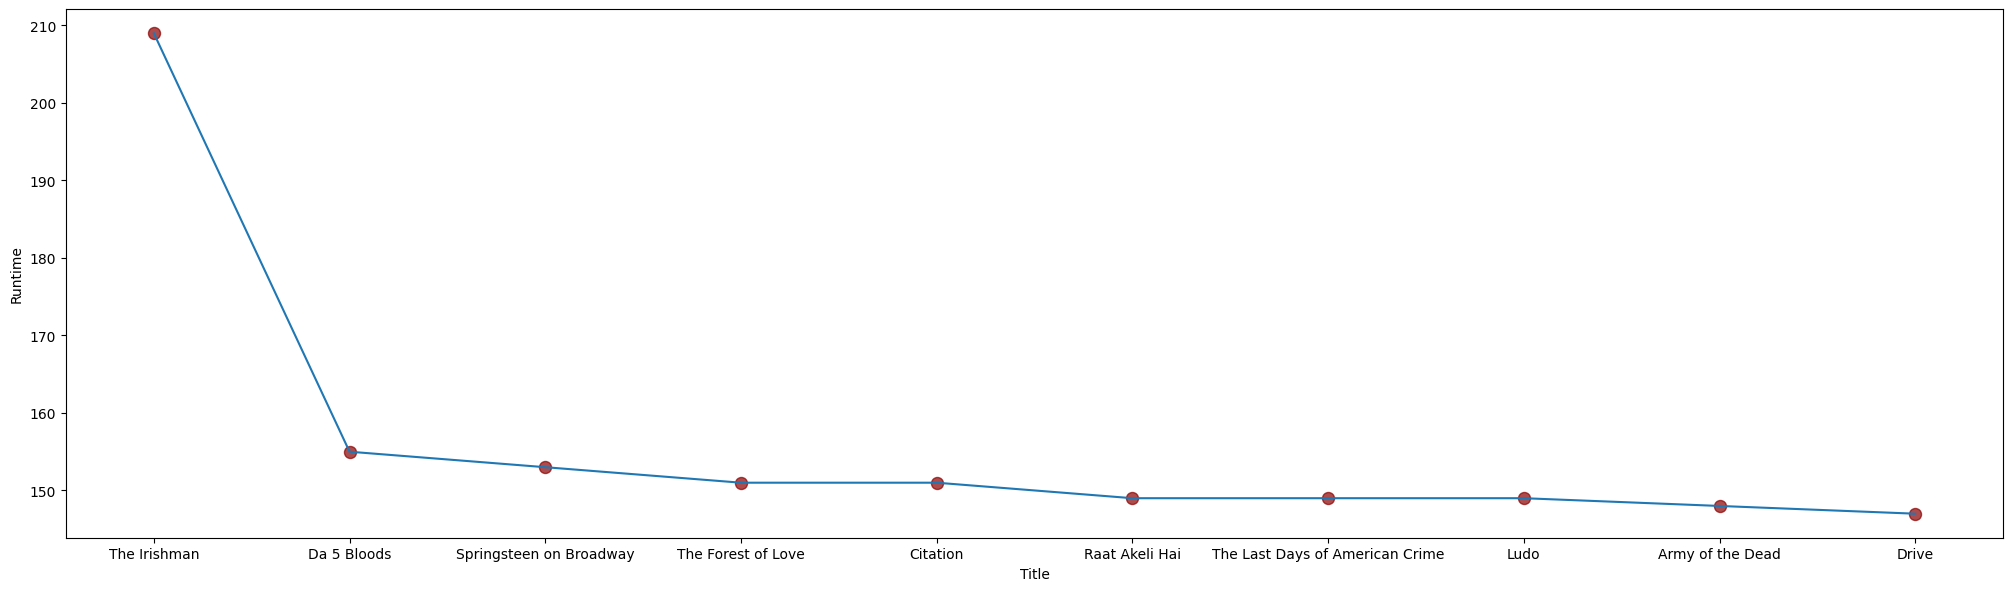

In [229]:
sub_runtime=data.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10]
runtime = sub_runtime.reset_index()
fig, ax = plt.subplots(figsize=(25,7),dpi=100)
ax.scatter(y=runtime["Runtime"], x=runtime["Title"], s=75, color='darkred', alpha=0.7)
sns.lineplot(x=runtime["Title"], y=runtime["Runtime"])
plt.show()

## 11-) Hangi yılda en fazla film yayımlanmıştır?

In [ ]:
df["Year"]=df["Premiere"].dt.year  
df["Month"]=df["Premiere"].dt.month

In [141]:
df.groupby(df['Year'])['Title'].count() # Yıl içinde çıkan film sayıları

Year
2015     1
2017     4
2018    15
2019    16
2020    21
2021    11
Name: Title, dtype: int64

In [142]:
print("En fazla film çıkan yıl: ",df.groupby(df['Year'])['Title'].count().idxmax())

En fazla film çıkan yıl:  2020


## 12-) Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir?

In [171]:
pd.pivot_table(data,index="Language",values="IMDB Score",aggfunc="mean").sort_values(by=["IMDB Score"]).head(1)

,IMDB Score
Language,
Malay,4.2


## 13-) Hangi yılın toplam "runtime" süresi en fazladır?

In [144]:
new_data.groupby(new_data['Year'])['Runtime'].sum()

Year
2015     136
2017     510
2018    1938
2019    2195
2020    2828
2021    1463
Name: Runtime, dtype: int64

In [145]:
print("'Runtime' süresi en fazla olan yil:",new_data.groupby(new_data['Year'])['Runtime'].sum().idxmax())
print(new_data.groupby(new_data['Year'])['Runtime'].sum().idxmax(), "yilinda toplam 'Runtime' süresi:",new_data.groupby(new_data['Year'])['Runtime'].sum().max())

'Runtime' süresi en fazla olan yil: 2020
2020 yilinda toplam 'Runtime' süresi: 2828


## 14-) Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [146]:
data.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

## 15-) Veri setinde outlier veri var mıdır? Açıklayınız.

Runtime          AxesSubplot(0.125,0.125;0.352273x0.755)
IMDB Score    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

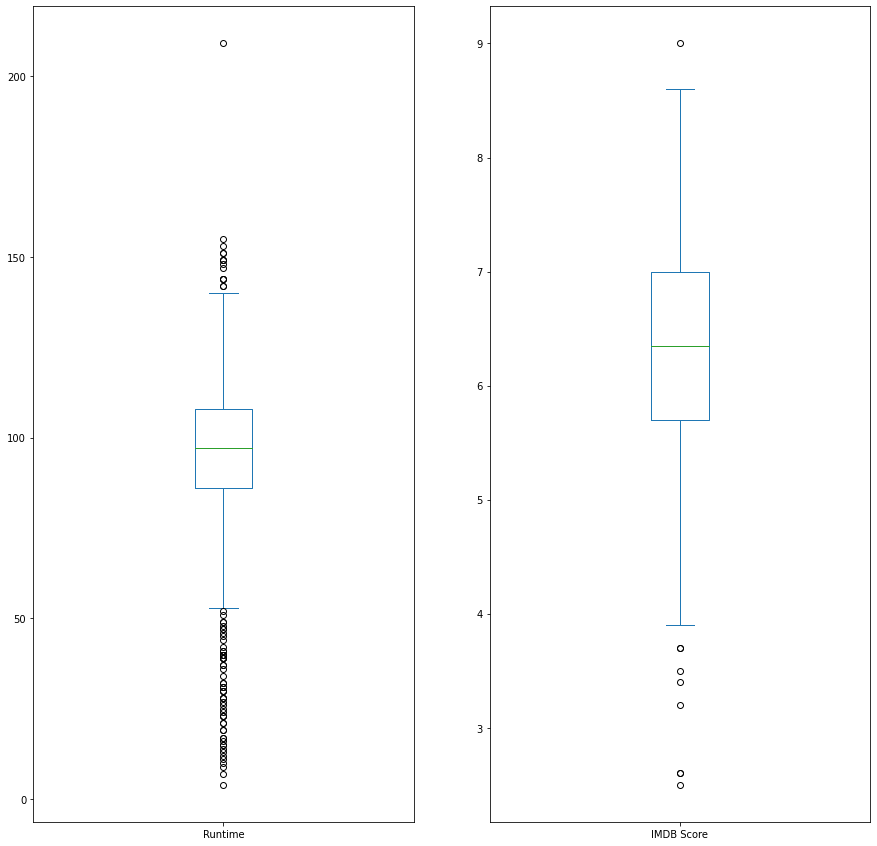

In [147]:
data.plot(kind="box", subplots=True, figsize=(15,15))
#Runtime ve IMDB Score verilerinde box plotta görüldüğü üzere (Q1-1.5IQR) ve (Q3+1.5IQR) uçları dışında veriler bulunmaktadır. Bu veriler outlier verilerdir.